<a href="https://colab.research.google.com/github/kronze1996/Capstone-Project-1/blob/main/Kartikey_Sharma_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><i>  World Bank Education Statistics

<b>"Education is not preparation for life; education is life itself." — John Dewey.</b><br>
John Dewey was an American philosopher, psychologist, and educational reformer whose ideas have been influential in education and social reform.
<br>(source : https://en.wikipedia.org/wiki/John_Dewey)

<br>Now let's talk about World Bank...

##What is World Bank ?
<b>The World Bank is a unique global partnership that finances development and aid projects to end poverty and promote prosperity. They cultivate leading experts who share insight, research and data with the development community.</b>

##What does World Bank do ?
<b>The World Bank Group works in every major area of development. They provide a wide array of financial products and technical assistance, and they help countries share and apply innovative knowledge and solutions to the challenges they face.</b>

<br>


#Let's first take a look at the problem statement :

##The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. 
<b>Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.

<i>Now we'll dive deep into the mysterious world of data wrangling B)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.axes as ax
%matplotlib inline

In order to understand our data, we can look at each dataset and try to understand their meaning and it's relevance to this problem.

In [ ]:
working_dir_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Data/'

EdStatsData_df = pd.read_csv(working_dir_path + 'Copy of EdStatsData.csv')
CountrySeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry-Series.csv')
EdStatSeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsSeries.csv')
EdStatsCountry_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry.csv')
EdStatsFootNote_df = pd.read_csv(working_dir_path + 'Copy of EdStatsFootNote.csv')

#1. EdStats Data :

Well that's almost a million records, that's quite alot :3. So from here we can see quite alot of them are <b>NaN</b> and some are years that exceed even <b>2020.</b> So from here we can assume that those years are nothing but predictions.<br>
We will now account for those years that have passed the limit of 1999 and ignore the predictions as it might affect our analyses.

In [ ]:
EdStatsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [29]:
EdStatsData_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Rough Work please ignore...!

#fetching columns of country :
# countryCols = list(countryComparision_df.columns)
# EdStatsData_df[(EdStatsData_df["Country Code"]==(i for i in )) and (EdStatsData_df["Indicator Code"]=="UIS.NERA.2") ]['2010'].median()

<i>Now let's check country series data 

#2. Country Series Data :

In [ ]:
CountrySeries_df.info()
#Contains repeated data....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [ ]:
CountrySeries_df.groupby("SeriesCode").first().reset_index()

,SeriesCode,CountryCode,DESCRIPTION
0,NY.GDP.MKTP.PP.CD,AFG,Estimates are based on regression.
1,NY.GDP.MKTP.PP.KD,AFG,Estimates are based on regression.
2,NY.GDP.PCAP.CD,CYP,Data are for areas under the effective control...
3,NY.GDP.PCAP.KD,CYP,Data are for areas under the effective control...
4,NY.GDP.PCAP.PP.CD,AFG,Estimates are based on regression.
5,NY.GDP.PCAP.PP.KD,AFG,Estimates are based on regression.
6,NY.GNP.MKTP.PP.CD,AFG,Estimates are based on regression.
7,NY.GNP.PCAP.CD,CYP,Data are for areas under the effective control...
8,NY.GNP.PCAP.PP.CD,AFG,Estimates are based on regression.
9,SP.POP.0014.FE.IN,GEO,Derived using ratio of age group from WPP and ...


I think we have unnamed column in all the datasets but one can't be too sure of so let's keep checking. Here, we can analyse all it contains are '<b>CountryCode</b>', '<b>SeriesCode</b>' and their description. Apparently all these data are also available in <i><b>EdStatsData</i></b>. So we'll just ignore this dataset.<br>
Moving onto next dataset...

#3. EdStatSeries Data :

Well this is interesting. I can see here we have a very important column named '<b><i>Topic</b></i>'. So let's just expand the column and check what it is.
I personally belive it would contain the topic of an indicator like what is it about or where does the indicator lies in.. <br><i>So let's check.

In [ ]:
EdStatSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [32]:
sample_df=EdStatSeries_df.groupby(['Topic']).first()
for i in sample_df["Indicator Name"]:
  print(i)

#4. EdStatsCountry Data :

In [ ]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
EdStatsCountry_df['External debt Reporting status']

0              NaN
1           Actual
2           Actual
3           Actual
4              NaN
          ...     
236         Actual
237         Actual
238    Preliminary
239         Actual
240         Actual
Name: External debt Reporting status, Length: 241, dtype: object

#5. EdStatsFootNote Data :

In [ ]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [ ]:
EdStatsFootNote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


# Dropping unnamed and empty columns :

First we will clear out all the rows that are not required or has no elements in it i.e. NaN

In [ ]:
EdStatsData_df.drop(['Unnamed: 69'],axis=1,inplace=True)
CountrySeries_df.drop(['Unnamed: 3'],axis=1,inplace=True)
EdStatSeries_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
EdStatsCountry_df.drop(['Unnamed: 31'],axis=1,inplace=True)
EdStatsFootNote_df.drop(['Unnamed: 4'],axis=1,inplace=True)

Now let's look at the first data set present with our problem statement

#But before we assume any years first we will check which countries have the most data in them

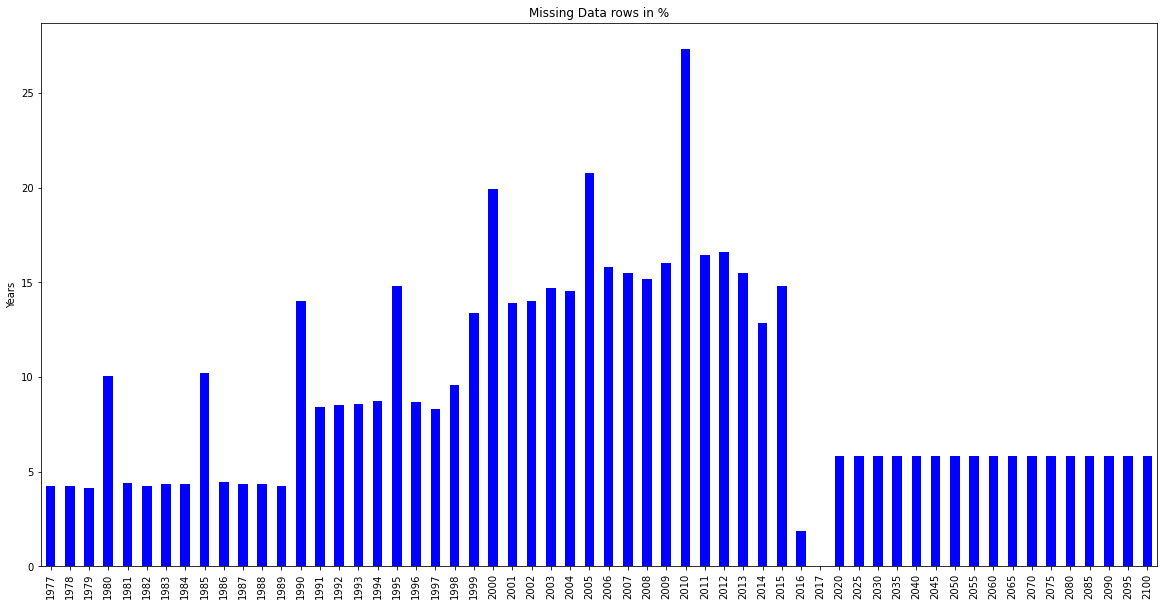

In [ ]:
#Plotting graph for data availabilty in the years (in %)
dataset1 = EdStatsData_df.loc[:,'1977':'2100'].notnull().sum()/len(EdStatsData_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
dataset1.plot(kind='bar', color='blue')
plt.title('Missing Data rows in %')
plt.ylabel('Years')
plt.show()

<i>Well this was quite insightfull now we know that from 1990 to 2014 has the most data in it

In [ ]:
#Fetching columns:
Cols = list(EdStatsData_df.columns)

<i>Well let's just assume from 2000 to 2015 almost a decade

In [ ]:
#Figuring out the number of years
for i in range(len(Cols)):
  if i >33 and i<50:
    print(Cols[i])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [ ]:
#Country Wise Bar Graph for one indicator
EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i >3]].mean().dropna()

1970    63.10
1975    62.36
1980    62.50
1985    55.22
1990    45.11
1995    37.21
2000    30.22
2005    12.62
2010    11.09
dtype: float64

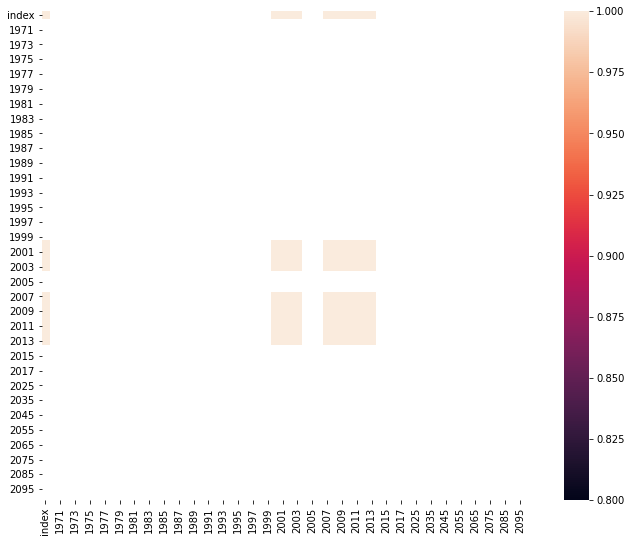

In [ ]:
corrmat=countryComparision_df[""].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
grouped=EdStatsData_df.groupby(['Indicator Name','Country Name']).first().reset_index()
# YearlyCountryStats_df=grouped.to_frame().reset_index()
# YearlyCountryStats_df.head()
#All indicators for one country :
grouped[grouped['Country Name']=='Nepal']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
156,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.813290,44.337891,NaN,35.704342,43.178299,46.130859,51.864101,54.402691,55.150131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.226582,44.941002,NaN,35.422729,42.492222,45.591648,51.854771,56.054459,56.685848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826870,1.027190,NaN,0.984640,0.969380,0.977440,0.999650,1.060890,1.055690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.277679,43.751389,NaN,35.975281,43.834450,46.644100,51.872952,52.837349,53.695530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,"Adjusted net enrolment rate, primary, both sex...",Nepal,NPL,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.32444,72.61187,NaN,NaN,80.401802,81.08564,NaN,NaN,NaN,NaN,NaN,NaN,98.635094,99.579483,NaN,94.661530,97.126549,97.107803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885876,"Youth illiterate population, 15-24 years, male...",Nepal,NPL,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,806983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591388.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439685.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257655.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886118,"Youth literacy rate, population 15-24 years, b...",Nepal,NPL,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.038450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.603722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.05362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.757150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886360,"Youth literacy rate, population 15-24 years, f...",Nepal,NPL,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.966610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.666439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.14379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.206830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886602,"Youth literacy rate, population 15-24 years, g...",Nepal,NPL,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.892340,NaN

In [ ]:

# EdStatsData_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
# sample=EdStatsData_df.groupby("Indicator Code")

# Capturing Country names


#Implementations :

In [ ]:
#Comparing Countries based on indicators data:
# countryComparision_df=EdStatsData_df[(EdStatsData_df['Indicator Code']=='SE.PRM.TENR') & ((EdStatsData_df['Country Name'] =='World') | (EdStatsData_df['Country Name'] =='Arab World'))].reset_index()
countryComparision_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='World')].reset_index()
countryComparision_df



#limited indicators (Top 10)
#Top 5 countries (USA,INDIA,CHINA,RUSSIA,)
#2000 - 2015 (Years)
#Analyses 
#Correlation between indicators 






,index,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,87960,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87961,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87962,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87963,World,WLD,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87964,World,WLD,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,72.353142,72.258461,73.130409,75.258324,75.926712,77.053207,77.671318,77.64193,76.567047,76.882843,78.00872,78.739258,79.171501,79.41024,79.651604,80.246422,81.013268,81.318687,81.945198,82.377724,82.318047,82.638046,82.590897,82.715782,82.828880,82.582642,82.397293,82.698830,83.322060,84.134033,84.990417,85.428032,86.442413,87.696312,88.759911,88.835770,89.233521,90.410072,90.643913,90.512466,90.719559,90.883148,91.206787,91.172462,91.264053,91.15509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,91620,World,WLD,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,91621,World,WLD,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.335480,83.335480,83.335480,83.335480,83.335480,83.339592,83.335480,83.335480,83.335480,83.335480,87.266312,87.266312,87.266312,87.266312,87.266312,87.269073,87.266312,87.266312,87.266312,87.266312,90.618355,90.618355,90.618355,90.618355,90.618355,90.620171,90.618355,90.618355,90.618355,90.618355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,91622,World,WLD,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.730957,78.730957,78.730957,78.730957,78.730957,78.736488,78.730957,78.730957,78.730957,78.730957,83.986298,83.986298,83.986298,83.986298,83.986298,83.989998,83.986298,83.986298,83.986298,83.986298,88.612938,88.612938,88.612938,88.612938,88.612938,88.615257,88.612938,88.612938,88.612938,88.612938,NaN,NaN

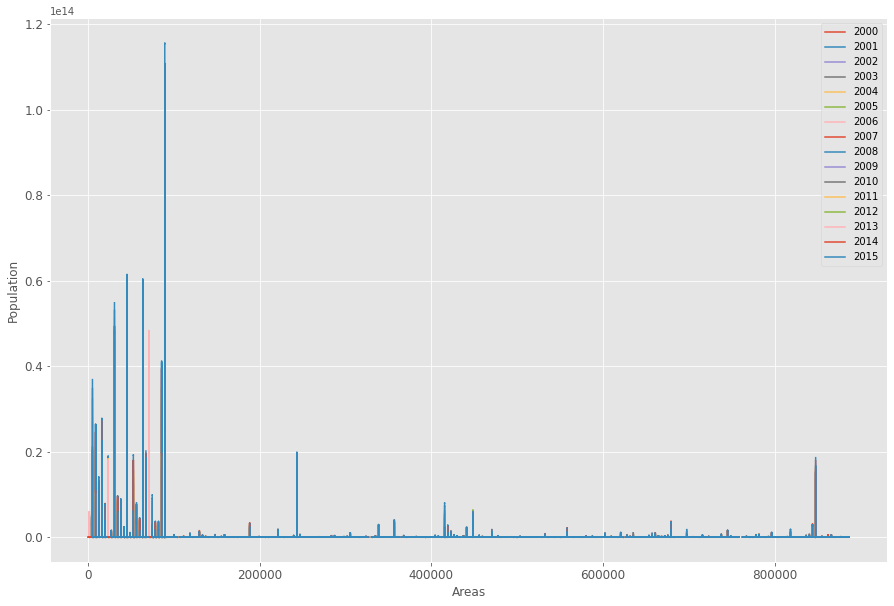

In [ ]:
# new_df=countryComparision_df.loc[:,'1977':'2015']

# (new_df.head(4)).plot(kind="barh")
# plt.show()
EEd=EdStatsData_df.loc[:,'2000':'2015']
plt.style.use('ggplot')
ax = EEd.plot(figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Areas",fontsize=12)
ax.set_ylabel("Population",fontsize=12)
plt.show()

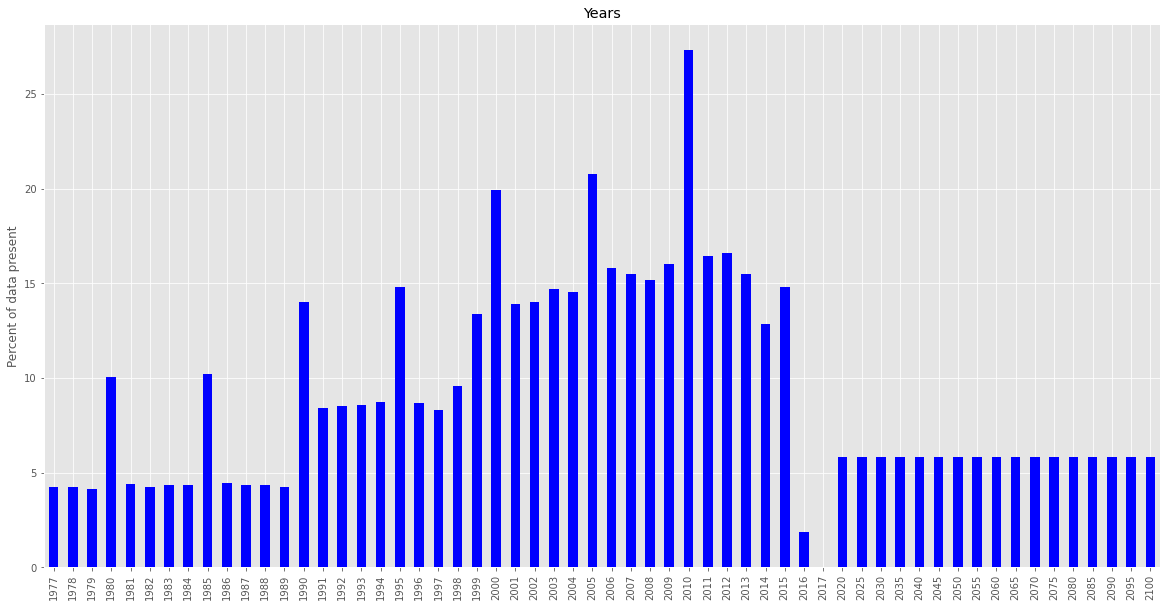

In [ ]:
#Data Present in Years


EdStats = (EdStatsData_df.loc[:,'1977':'2100'].notnull().sum()/len(EdStatsData_df))*100
plt.figure(figsize=(20,10))
plt.subplot()
EdStats.plot(kind='bar',color='blue')
plt.title('Years')
plt.ylabel('Percent of data present')
plt.show()

In [ ]:
# Capturing Top 5 Indicator names :

indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names
for i in range(len(indicator_names)):
  if "PISA" in indicator_names[i] and "both gender" in indicator_names[i]:
    print(indicator_names[i])

# EdStats[EdStats["Indicator Name"]==]
# Adjusted net enrolment rate, primary, both sexes (%)
# Adjusted net enrolment rate, upper secondary, both sexes (%)
# Adult illiterate population, 15+ years, both sexes (number)
# Adult literacy rate, population 15+ years, both sexes (%)

# Current education expenditure, primary (% of total expenditure in primary public institutions)
# Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)
# Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)
# Primary education, pupils (% female)
# Primary education, teachers (% female)
# Secondary education, general pupils (% female)
# Secondary education, pupils (% female)
# Secondary education, teachers (% female)
# Secondary education, vocational pupils (% female)

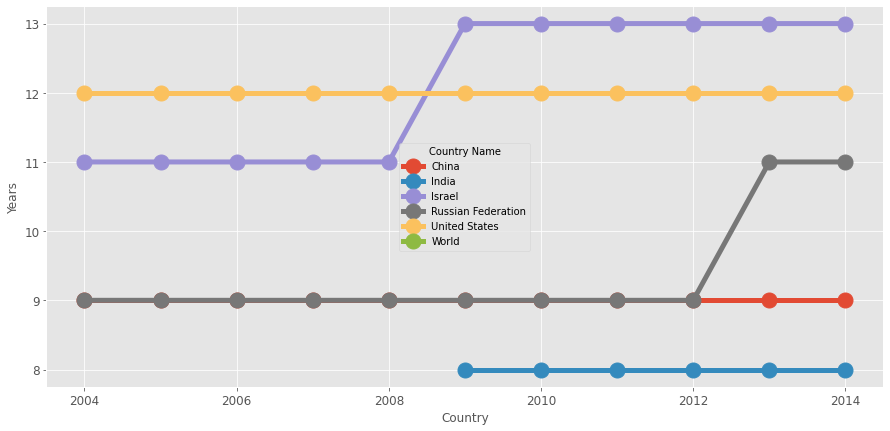

In [39]:
EdStatsData_precise_df=EdStatsData_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
EdStatsData_precise_df=EdStatsData_precise_df[(EdStatsData_df["Country Name"]=='World') | (EdStatsData_df["Country Name"]=='India') | (EdStatsData_df["Country Name"]=='China') 
| (EdStatsData_df["Country Name"]=='United States') | (EdStatsData_df["Country Name"]=='Russian Federation') | (EdStatsData_df["Country Name"]=='Israel')]
df4=EdStatsData_precise_df[EdStatsData_precise_df["Indicator Name"]=='Duration of compulsory education (years)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15)
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("Years",fontsize=12)
plt.show()


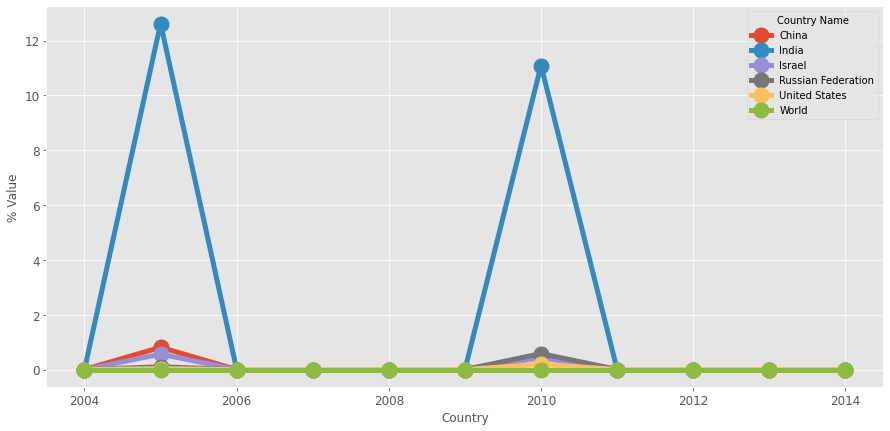

In [35]:
EdStatsData_precise_df=EdStatsData_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
EdStatsData_precise_df=EdStatsData_precise_df[(EdStatsData_df["Country Name"]=='World') | (EdStatsData_df["Country Name"]=='India') | (EdStatsData_df["Country Name"]=='China') 
| (EdStatsData_df["Country Name"]=='United States') | (EdStatsData_df["Country Name"]=='Russian Federation') | (EdStatsData_df["Country Name"]=='Israel')]
df4=EdStatsData_precise_df[EdStatsData_precise_df["Indicator Name"]=='Barro-Lee: Percentage of female population age 15-19 with no education']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].sum()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15)
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("% Value",fontsize=12)
plt.show()

# Barro-Lee: Percentage of female population age 15-19 with no education
# Duration of compulsory education (years)

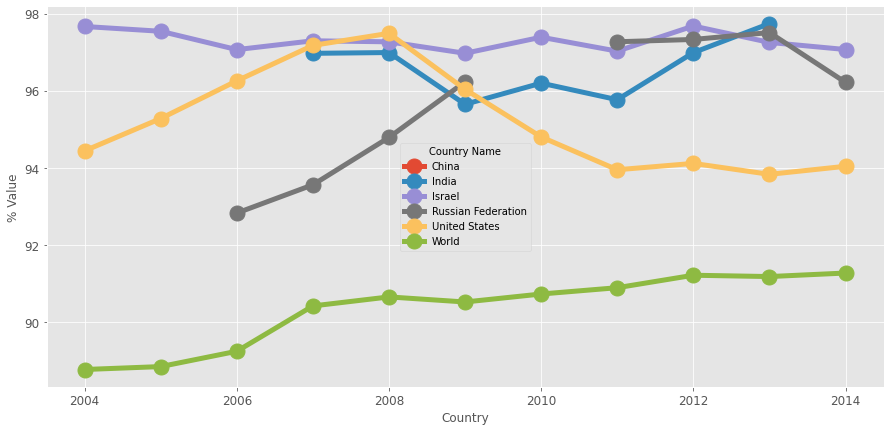

In [45]:
EdStatsData_precise_df=EdStatsData_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
EdStatsData_precise_df=EdStatsData_precise_df[(EdStatsData_df["Country Name"]=='World') | (EdStatsData_df["Country Name"]=='India') | (EdStatsData_df["Country Name"]=='China') 
| (EdStatsData_df["Country Name"]=='United States') | (EdStatsData_df["Country Name"]=='Russian Federation') | (EdStatsData_df["Country Name"]=='Israel')]
df4=EdStatsData_precise_df[EdStatsData_precise_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)']
df4.reset_index()
df_compare=df4.groupby('Country Name')[['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']].mean()
df_compare=df_compare.T
plt.style.use('ggplot')
ax = df_compare.plot(figsize=(15,7),legend=True, fontsize=12 ,linewidth=5, marker="o",markersize=15)
ax.set_xlabel("Country",fontsize=12)
ax.set_ylabel("% Value",fontsize=12)
plt.show()


In [ ]:
neww_df=EdStatsData_df[(EdStatsData_df["Country Name"]=='Arab World') & (EdStatsData_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]

newww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]
india_df=EdStatsData_df[(EdStatsData_df["Country Name"]=='India') & (EdStatsData_df["Indicator Name"]=='Adjusted net enrolment rate, primary, both sexes (%)')]
inewww_df=neww_df[['Country Name','Country Code','Indicator Name','Indicator Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']]

<Figure size 1440x720 with 0 Axes>

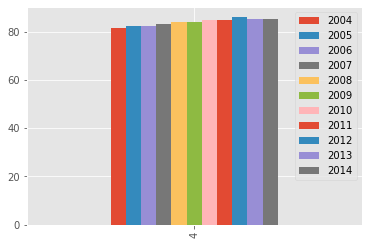

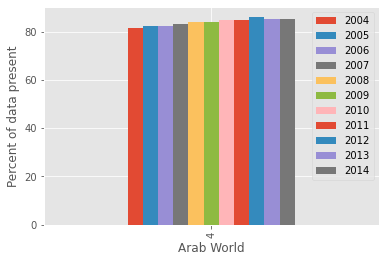

In [ ]:
# plt.figure(figsize=(50,5))
# newww_df.plot(x=)
# plt.title('Years')
# plt.ylabel('Percent of data present')
# plt.show()

EdStats = (newww_df.loc[:,'2004':'2014'])
plt.figure(figsize=(20,10))
# plt.subplot()
newww_df.plot(kind='bar')
inewww_df.plot(kind='bar')
plt.xlabel('Arab World')
plt.ylabel('Percent of data present')
plt.show()

In [ ]:
#           Important indicators 
#               PISA
# PISA: 15-year-olds by mathematics proficiency level (%). Below Level 1
# PISA: 15-year-olds by mathematics proficiency level (%). Level 1
# PISA: 15-year-olds by mathematics proficiency level (%). Level 2
# PISA: 15-year-olds by mathematics proficiency level (%). Level 3
# PISA: 15-year-olds by mathematics proficiency level (%). Level 4
# PISA: 15-year-olds by mathematics proficiency level (%). Level 5
# PISA: 15-year-olds by mathematics proficiency level (%). Level 6




In [ ]:
#Calculating mean for all Data

country1_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i >3 ]].mean().dropna().to_frame()


# (EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[countryCols[i] for i in range(len(countryCols)) if i>3 ]].median().dropna()).mean()

In [ ]:
country2_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i >3]].mean().dropna().to_frame()
country3_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Arab' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country4_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BHR' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country5_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BLZ' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()


Text(0.5, 0, 'Series Code')

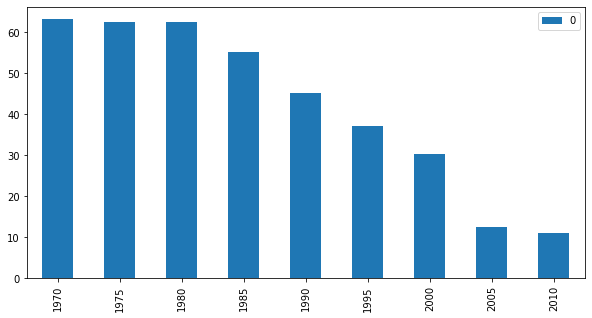

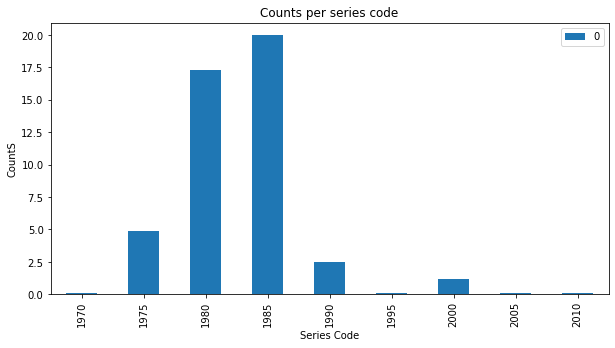

In [ ]:
#Meadian Value graph printed for Country India and Zimbabwe

plt.rcParams['figure.figsize'] = (10, 5)
country1_df.plot(kind='bar')
country2_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

Text(0.5, 0, 'Series Code')

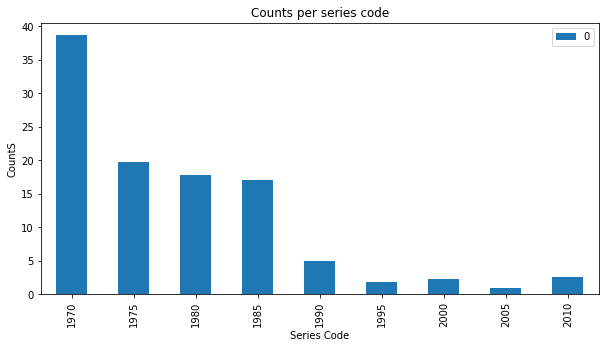

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
# country3_df.plot(kind='bar')
country4_df.plot(kind='bar')
plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

# country5_df.plot(kind='bar')


In [ ]:
#fetching country codes:
CountryName=set()
for i in EdStatsData_df['Country Name']:
  CountryName.add(i)
CountryName

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',


In [ ]:
# Plotting in graph of country with max data :
CN=list(CountryName)
length=[]
countries=[]
  
for i in range(len(CountryName)):
  countryComparision_df=EdStatsData_df[(EdStatsData_df['Country Name'] == CN[i])][[Cols[i] for i in range(len(Cols)) if i >34 and i<51 ]].reset_index()
  EdStats=(countryComparision_df.count(axis=1))
  for i in range(len(EdStats)):
    length.append(EdStats[i])
  countries.append((sum(length)/(3665*22*242)*100))


In [ ]:
countrydatapercent=zip(CountryName,countries)

In [ ]:
list(countrydatapercent)

[('Lao PDR', 0.09494446112894017),
 ('World', 0.143800422909259),
 ('Ghana', 0.23625416784967143),
 ('Grenada', 0.29479624814093147),
 ('Belize', 0.38236593438244076),
 ('Trinidad and Tobago', 0.45127574893170824),
 ('Korea, Rep.', 0.542719882577594),
 ('South Asia', 0.5871222798150515),
 ('Bhutan', 0.6598245428818303),
 ('Togo', 0.7393942127235623),
 ('Lebanon', 0.8245910561764124),
 ('San Marino', 0.8536647865005232),
 ('Chile', 0.9397174933350281),
 ('Greece', 1.0231462357898493),
 ('Kazakhstan', 1.1110285427875315),
 ('Kosovo', 1.1319485087989931),
 ('Bolivia', 1.2140652690639724),
 ('Turkey', 1.3045715404413385),
 ('Austria', 1.3953904325748778),
 ('France', 1.4869678144119194),
 ('Estonia', 1.5815586553412537),
 ('Cabo Verde', 1.6621738109905158),
 ('Rwanda', 1.7387300217399548),
 ('Malaysia', 1.8210825288046715),
 ('Netherlands', 1.9086778396983262),
 ('Tunisia', 1.9916760879971054),
 ('Bahrain', 2.069841526901272),
 ('Bermuda', 2.115755778615305),
 ('El Salvador', 2.21092061175

In [ ]:
data=dict(countrydatapercent)
k =data.keys()
v =data.values()



In [ ]:
k
# plt.figure(figsize=(35,10))
# plt.subplot()
# plt.xticks(rotation=90)
# plt.bar(k, v)
# plt.title("Countries Data present")

dict_keys([])

In [ ]:
a=Counter(dict(countrydatapercent)).most_common(5)

In [33]:
#fetching indicator codes
indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [ ]:
medians=[]

In [ ]:
#Fetching median for all indicators and storing in a new df:
MedianYearEdStats_df=EdStatsData_df[["Indicator Name","Country Name","Country Code","Indicator Code"]]

for j in range(len(indicator_names)):
  for i in range(len(CountryCodes)):
    medians.append((EdStatsData_df[(EdStatsData_df['Country Code'] == CountryCodes[i] )  & (EdStatsData_df['Indicator Code']== indicator_names[j] )] [[Cols[i] for i in range(len(Cols)) if i >34 and i<51 ]].median().dropna()).mean())


KeyboardInterrupt: ignored

In [ ]:
medians

[nan,
 81.24222222222221,
 nan,
 5.7666666666666675,
 nan,
 nan,
 29.11,
 1.2822222222222222,
 3.083333333333334,
 nan,
 nan,
 0.8799999999999999,
 0.8533333333333334,
 nan,
 60.580000000000005,
 2.1877777777777774,
 63.85888888888889,
 nan,
 46.556666666666665,
 2.29,
 11.731111111111112,
 nan,
 nan,
 nan,
 2.396666666666667,
 nan,
 10.30888888888889,
 10.046666666666665,
 1.0111111111111108,
 18.13111111111111,
 nan,
 11.075555555555557,
 67.00888888888889,
 0.29333333333333333,
 16.162222222222223,
 nan,
 1.5166666666666668,
 3.505555555555555,
 52.678888888888885,
 34.84777777777778,
 47.01333333333334,
 12.114444444444445,
 4.69,
 nan,
 nan,
 2.232222222222222,
 1.3544444444444443,
 nan,
 nan,
 5.235555555555555,
 0.4677777777777778,
 24.081111111111113,
 nan,
 nan,
 0.16555555555555557,
 11.231111111111112,
 32.114444444444445,
 nan,
 nan,
 nan,
 nan,
 8.831111111111111,
 37.150000000000006,
 nan,
 nan,
 5.808888888888889,
 1.0899999999999999,
 nan,
 nan,
 0.6,
 2.61,
 0.55888888

In [34]:
sample_df=EdStatSeries_df.groupby(['Topic']).first()
for i in sample_df["Indicator Name"]:
  print(i)

Barro-Lee: Percentage of female population age 15-19 with no education
Duration of compulsory education (years)
Africa Dataset: School census return rate from primary schools
SABER: (Early Childhood Development) Policy Goal 1: Establishing an Enabling Environment
Enrolment in pre-primary education, both sexes (number)
GNI per capita, Atlas method (current US$)
GDP (constant 2010 US$)
GDP (current US$)
GDP, PPP (current international $)
DHS: Gross attendance rate. Post Secondary
SABER: (Education Management Information Systems) Policy Goal 1: Enabling Environment
SABER: (Engaging the Private Sector, Government funded) Policy Goal 5: Encouraging innovation by providers
Current expenditure as % of total expenditure in public institutions (%)
Mortality rate, under-5 (per 1,000 live births)
Population growth (annual %)
Population ages 0-14, female
Prevalence of HIV, total (% of population ages 15-49)
Personal computers (per 100 people)
Share of youth not in education, employment or training

In [ ]:
MedianYearEdStats_df.loc[(MedianYearEdStats_df['Country Code'] == CountryCodes[i] )  & (MedianYearEdStats_df['Indicator Code']== indicator_names[j] )]["Mean Year"]=medians

,Indicator Name,Country Name,Country Code,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",Arab World,ARB,SE.PRM.TENR
...,...,...,...,...
886925,"Youth illiterate population, 15-24 years, male...",Zimbabwe,ZWE,UIS.LP.AG15T24.M
886926,"Youth literacy rate, population 15-24 years, b...",Zimbabwe,ZWE,SE.ADT.1524.LT.ZS
886927,"Youth literacy rate, population 15-24 years, f...",Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS
886928,"Youth literacy rate, population 15-24 years, g...",Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS


# Extra observations from data wrangling:
-Total 195 countries are present in the world but 242 are given as per the dataset.
-Some datasets were not useful for our analyses like (EdStatsFootNote)

#Summary:
1. Fake Columns named (unamed) having zero data (Done) 